In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime



In [2]:
netflix = pd.read_csv('NetflixOriginals.csv', encoding = 'ISO-8859-1')
df = netflix.copy()

In [3]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


In [6]:
df.Title = pd.Categorical(df.Title)
df.Genre = pd.Categorical(df.Genre)
df.Premiere = pd.Categorical(df.Premiere)
df.Language = pd.Categorical(df.Language)

In [7]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [8]:
df.isna().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df.Premiere)
df['Date'].head()

0   2019-08-05
1   2020-08-21
2   2019-12-26
3   2018-01-19
4   2020-10-30
Name: Date, dtype: datetime64[ns]

In [10]:
df.drop(labels = ['Premiere'], axis = 1, inplace = True)
df.head()

,Title,Genre,Runtime,IMDB Score,Language,Date
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019-08-05
1,Dark Forces,Thriller,81,2.6,Spanish,2020-08-21
2,The App,Science fiction/Drama,79,2.6,Italian,2019-12-26
3,The Open House,Horror thriller,94,3.2,English,2018-01-19
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020-10-30


In [11]:
us = df.copy()
us = us[us['Runtime'] >= 60]
us.head(10)

,Title,Genre,Runtime,IMDB Score,Language,Date
1,Dark Forces,Thriller,81,2.6,Spanish,2020-08-21
2,The App,Science fiction/Drama,79,2.6,Italian,2019-12-26
3,The Open House,Horror thriller,94,3.2,English,2018-01-19
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020-10-30
5,Drive,Action,147,3.5,Hindi,2019-11-01
6,Leyla Everlasting,Comedy,112,3.7,Turkish,2020-12-04
7,The Last Days of American Crime,Heist film/Thriller,149,3.7,English,2020-06-05
8,Paradox,Musical/Western/Fantasy,73,3.9,English,2018-03-23
9,Sardar Ka Grandson,Comedy,139,4.1,Hindi,2021-05-18
11,The Call,Drama,112,4.1,Korean,2020-11-27


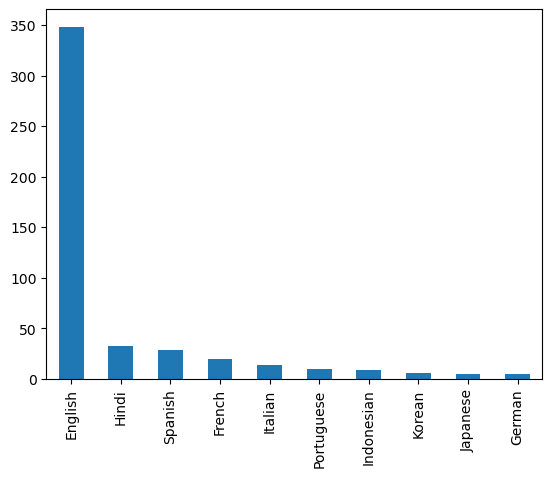

In [12]:
us["Language"].value_counts()[:10].plot(kind = 'bar');

In [13]:
dtdf = df.copy()
dtdf = dtdf[(dtdf['Date'] >= '2019-01-01') & (dtdf['Date'] <= '2020-05-31')]
dtdf = dtdf[dtdf['Genre'] == 'Documentary']
dtdf.head(10)

,Title,Genre,Runtime,IMDB Score,Language,Date
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019-08-05
15,After the Raid,Documentary,25,4.3,Spanish,2019-12-19
20,"Hello Privilege. It's Me, Chelsea",Documentary,64,4.4,English,2019-09-13
30,After Maria,Documentary,37,4.6,English/Spanish,2019-05-24
111,Ghosts of Sugar Land,Documentary,21,5.5,English,2019-10-16
263,A Tale of Two Kitchens,Documentary,30,6.3,English/Spanish,2019-05-22
286,The Legend of Cocaine Island,Documentary,87,6.3,English,2019-03-29
290,Travis Scott: Look Mom I Can Fly,Documentary,85,6.3,English,2019-08-28
295,Birders,Documentary,37,6.4,English/Spanish,2019-09-25
303,Murder to Mercy: The Cyntoia Brown Story,Documentary,97,6.4,English,2020-04-29


In [14]:
dtdf = dtdf.groupby('Title').sum().sort_values(by = 'IMDB Score', ascending = False)[:10]
dtdf = dtdf.drop(labels = ['Runtime'], axis = 1)

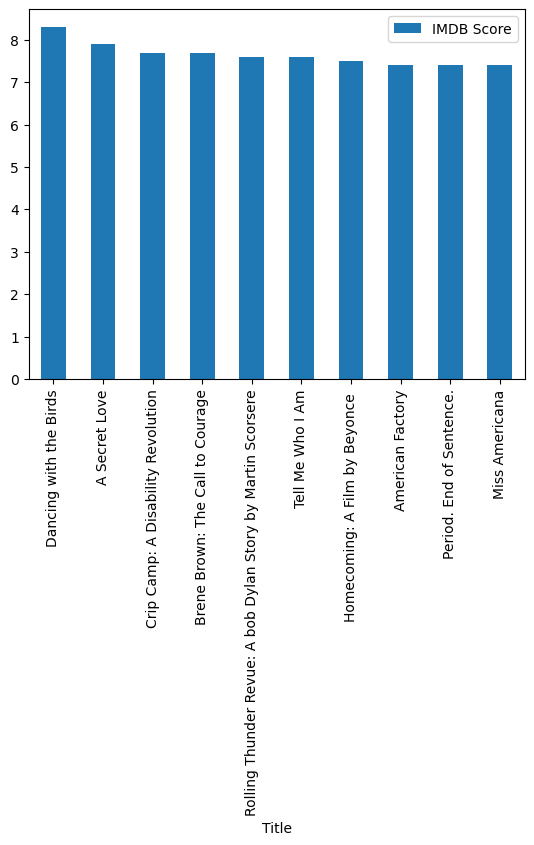

In [15]:
dtdf.plot(kind = 'bar');

In [16]:
eng = df.copy()
most=eng[(eng['Language'] == 'English') & (eng["IMDB Score"]>=9)]
most

,Title,Genre,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,83,9.0,English,2020-10-04


In [17]:
most["Genre"]

583    Documentary
Name: Genre, dtype: category
Categories (115, object): ['Action', 'Action comedy', 'Action thriller', 'Action-adventure', ..., 'War drama', 'War-Comedy', 'Western', 'Zombie/Heist']

In [18]:
hindi = df.copy()
hindi = hindi[hindi['Language'] == 'Hindi']
hindi.head(5)

,Title,Genre,Runtime,IMDB Score,Language,Date
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020-10-30
5,Drive,Action,147,3.5,Hindi,2019-11-01
9,Sardar Ka Grandson,Comedy,139,4.1,Hindi,2021-05-18
16,Ghost Stories,Horror anthology,144,4.3,Hindi,2020-01-01
23,The Girl on the Train,Thriller,120,4.4,Hindi,2021-02-26


In [19]:
hindi.Runtime.mean()

115.78787878787878

In [20]:
df.Genre.nunique()

115

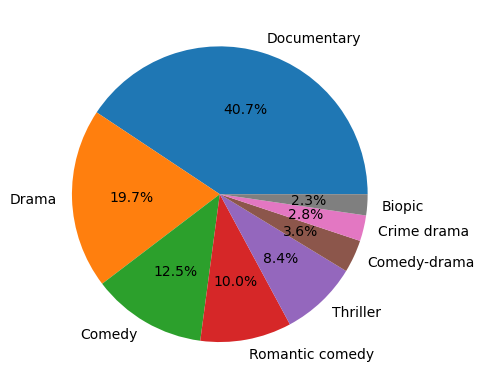

In [21]:
data = df["Genre"].value_counts().head(8)
plt.pie(df["Genre"].value_counts().head(8), labels=data.index ,autopct='%1.1f%%');
plt.show()

In [22]:
df.Language.value_counts()[:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In [23]:
imdb_topten = df.groupby('Title').sum().sort_values(by = 'IMDB Score', ascending = False)[:10]
imdb_topten.drop(labels = ['Runtime'], inplace = True, axis = 1)
imdb_topten

,IMDB Score
Title,
David Attenborough: A Life on Our Planet,9.0
Emicida: AmarElo - It's All For Yesterday,8.6
Springsteen on Broadway,8.5
Ben Platt: Live from Radio City Music Hall,8.4
Taylor Swift: Reputation Stadium Tour,8.4
Winter on Fire: Ukraine's Fight for Freedom,8.4
Cuba and the Cameraman,8.3
Dancing with the Birds,8.3
The Three Deaths of Marisela Escobedo,8.2


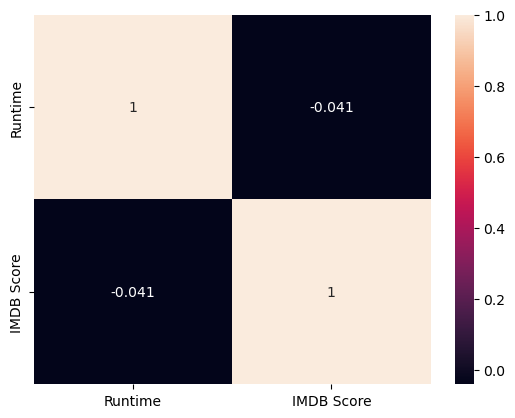

In [24]:
sns.heatmap(df.corr(), annot = True);

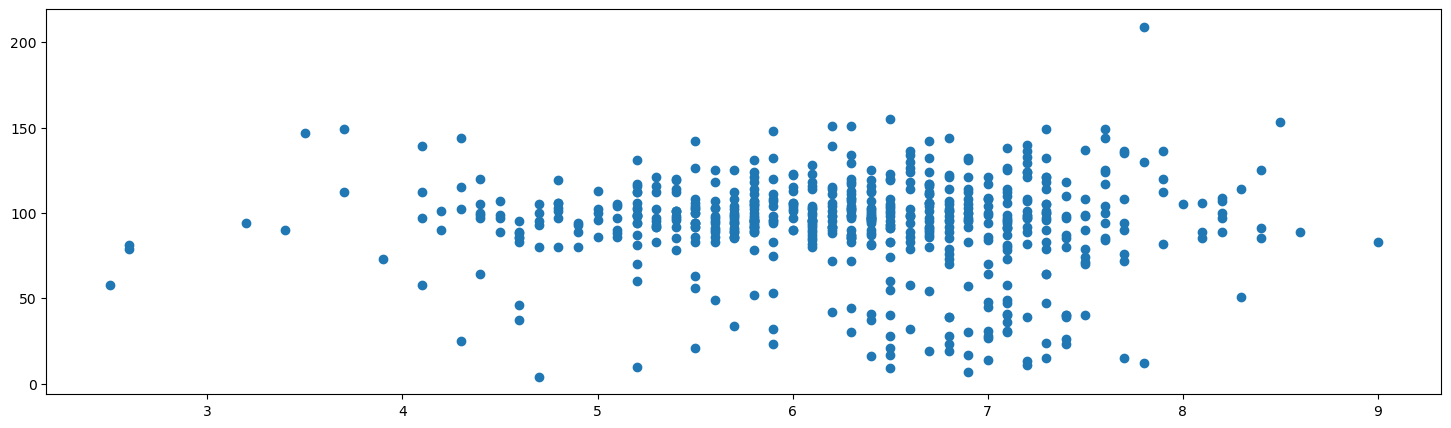

In [25]:
fig=plt.figure(figsize=(18,5))
plt.scatter(df["IMDB Score"],df["Runtime"])
plt.show()

In [26]:
best_IMDB = df.groupby("Genre").agg({"IMDB Score": "mean"}).sort_values("IMDB Score", ascending=False).head(10)

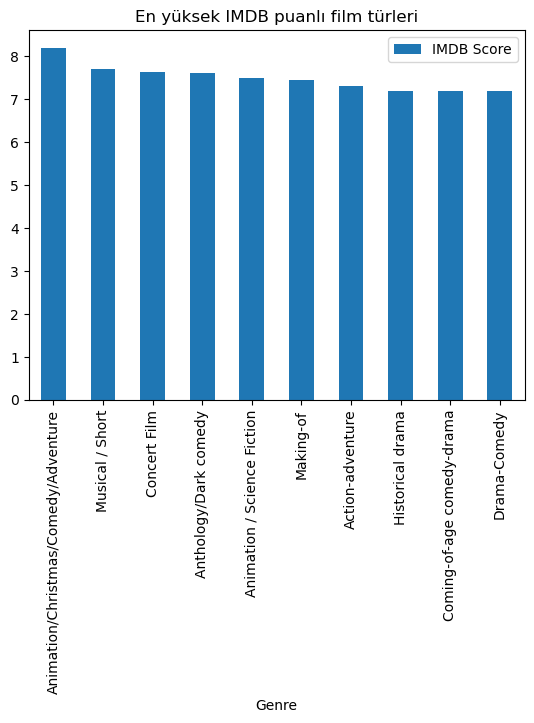

In [27]:
best_IMDB.plot(kind = "bar")
plt.title("En yüksek IMDB puanlı film türleri")
plt.show()

In [28]:
df_Runtime = df.groupby('Title').sum().sort_values(by = 'Runtime', ascending = False)[:10]

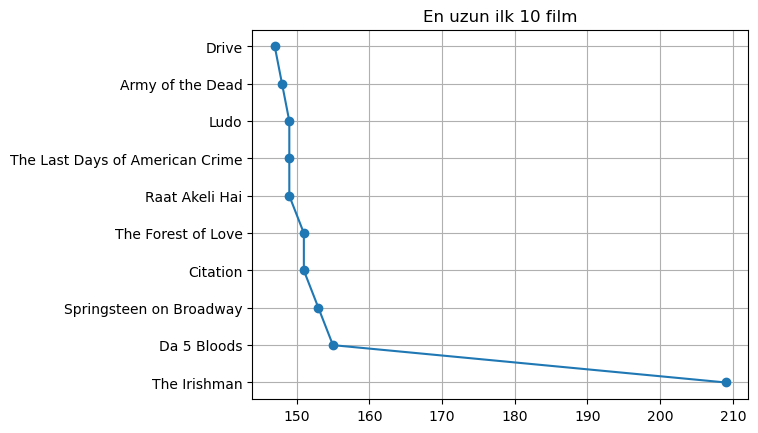

In [29]:
df_Runtime = df.sort_values(["Runtime"], ascending=False).head(10)
plt.plot(df_Runtime["Runtime"], df_Runtime["Title"], marker = "o")
plt.title("En uzun ilk 10 film")
plt.grid()
plt.show()

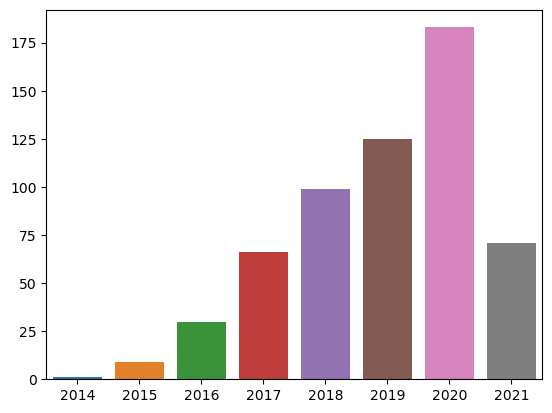

In [30]:
year_most = df.copy()
year_most['Year'] = year_most['Date'].dt.year
year = year_most.Year.value_counts()
sns.barplot(x = year.index, y = year.values);

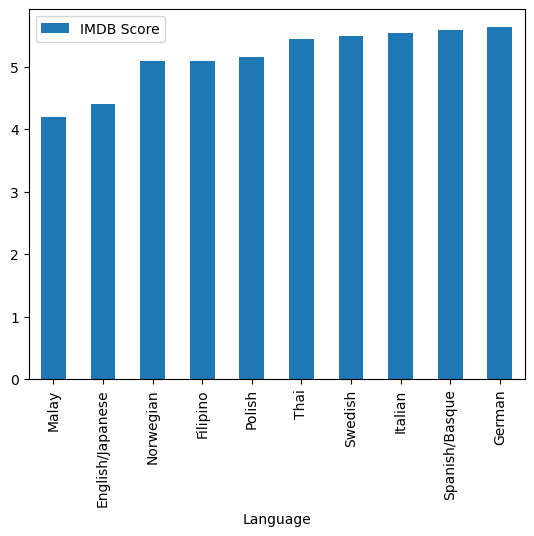

In [31]:
low_imdb = df.copy()
low_imdb = low_imdb.groupby('Language').mean().sort_values(by = 'IMDB Score')[:10]
low_imdb.drop(labels = ['Runtime'], axis = 1, inplace = True)
low_imdb.plot(kind = 'bar');

In [32]:
max_runtime = year_most.groupby('Year').sum().sort_values(by = 'Runtime', ascending = False)[:5]
max_runtime.drop(labels = ['IMDB Score'], axis = 1, inplace = True)
max_runtime

,Runtime
Year,
2020,17384
2019,10856
2018,9405
2021,7214
2017,6129


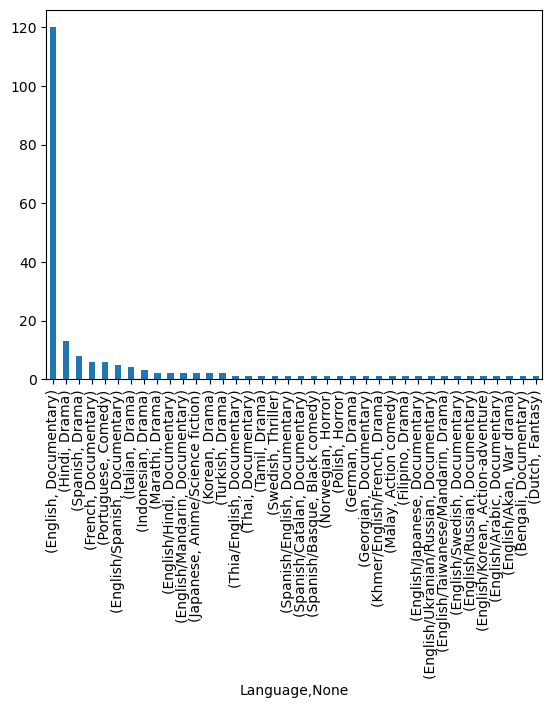

In [33]:
mgl = df.groupby(['Language'])['Genre'].value_counts().sort_values(ascending = False).groupby(level = 0).head(1) 
mgl.plot(kind = 'bar');

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


In [35]:
!pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    category      
 1   Genre       584 non-null    category      
 2   Runtime     584 non-null    int64         
 3   IMDB Score  584 non-null    float64       
 4   Language    584 non-null    category      
 5   Date        584 non-null    datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(1), int64(1)
memory usage: 43.1 KB


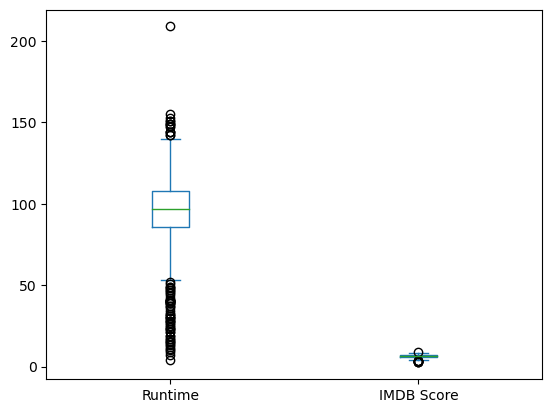

In [37]:
num_cols = ["Runtime", "IMDB Score"]
df[num_cols].plot(kind = "box");

In [38]:
def outlier_thresholds(dataframe, col_name, q1=0.2, q3=0.8):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    IQR = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * IQR
    low_limit = quartile1 - 1.5 * IQR
    print(f"{col_name} low_ limit: {low_limit}")
    print(f"{col_name} up_ limit: {up_limit}")
    return low_limit, up_limit

In [39]:
outlier_thresholds(df, "Runtime")
outlier_thresholds(df, "IMDB Score")

Runtime low_ limit: 39.5
Runtime up_ limit: 155.5
IMDB Score low_ limit: 3.1000000000000005
IMDB Score up_ limit: 9.5


(3.1000000000000005, 9.5)

In [40]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis = None):
        print(dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)])
    else:
        False

In [41]:
check_outlier(df, "Runtime")

Runtime low_ limit: 39.5
Runtime up_ limit: 155.5
                                                 Title                  Genre  \
15                                      After the Raid            Documentary   
30                                         After Maria            Documentary   
40                                         Sol Levante          Anime / Short   
66   American Factory: A Conversation with the Obamas   Aftershow / Interview   
111                               Ghosts of Sugar Land            Documentary   
152                                   Out of Many, One            Documentary   
197     Frankenstein's Monster's Monster, Frankenstein           Mockumentary   
199  Notes from Dunblane: Lesson from a School Shoo...            Documentary   
263                             A Tale of Two Kitchens            Documentary   
295                                            Birders            Documentary   
301                  John Was Trying to Contact Aliens     

/var/folders/6g/ty_pf5f976bgqxzkwmsmrpfc0000gn/T/ipykernel_9076/1560255180.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'bool_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis = None):


In [42]:
check_outlier(df, "IMDB Score")

IMDB Score low_ limit: 3.1000000000000005
IMDB Score up_ limit: 9.5
             Title                  Genre  Runtime  IMDB Score  \
0  Enter the Anime            Documentary       58         2.5   
1      Dark Forces               Thriller       81         2.6   
2          The App  Science fiction/Drama       79         2.6   

           Language       Date  
0  English/Japanese 2019-08-05  
1           Spanish 2020-08-21  
2           Italian 2019-12-26  


/var/folders/6g/ty_pf5f976bgqxzkwmsmrpfc0000gn/T/ipykernel_9076/1560255180.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'bool_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis = None):
